In [1]:
#Flores Vargas Michael Rubed

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# utilizado para la manipulación de directorios y rutas
import os
# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [4]:
!ls
%mkdir data
!ls

data  drive  entrenamiento.csv	prueva.csv  sample_data
mkdir: cannot create directory ‘data’: File exists
data  drive  entrenamiento.csv	prueva.csv  sample_data


In [5]:
data = pd.read_csv('/content/drive/MyDrive/IA/regrecion logistica/train.csv')

# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.to_csv("entrenamiento.csv", index=False)
test_data.to_csv("prueva.csv", index=False)
data = pd.read_csv('/content/entrenamiento.csv')
data = data.to_numpy()
X, y= data [:, 1:],data[:, 0]
y[y == 24] = 0
input_layer_size  = 784
num_labels = 24
m = y.size
print(X.shape)
print(y.shape)

(6815, 784)
(6815,)


In [6]:
data.shape

(6815, 785)

In [7]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

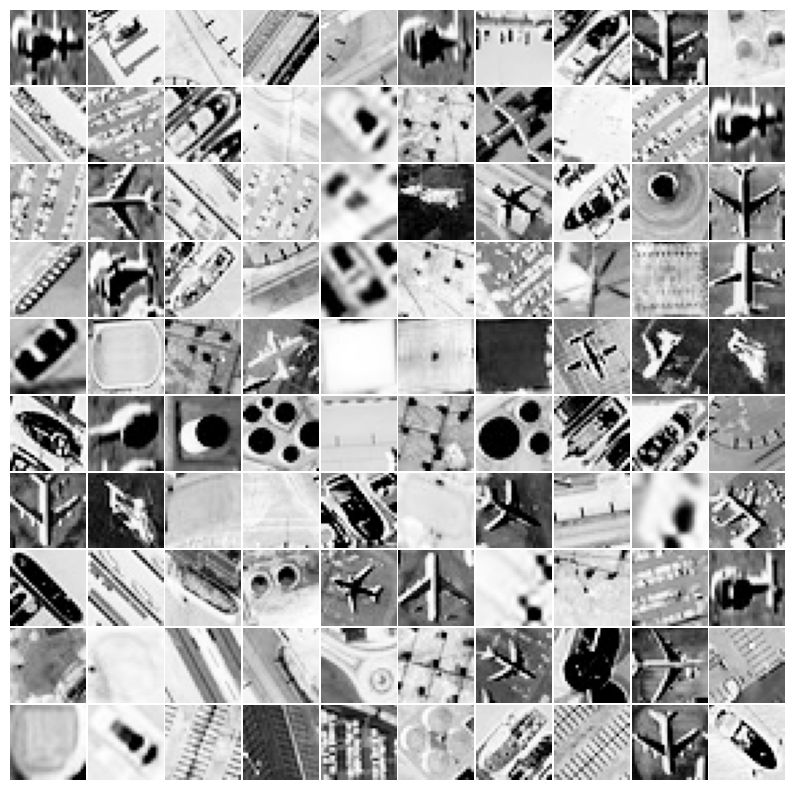

In [8]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [9]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    clip_z=np.clip(z,-700,700)
    return 1.0 / (1.0 + np.exp(-clip_z))

In [10]:
def oneVsAll(X, y, num_labels, lambda_):

    # algunas variables utiles
    m, n = X.shape

    # print(m, n)
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)
        # print(res)
        all_theta[c] = res.x

    return all_theta

In [12]:
def lrCostFunction(theta, X, y, lambda_):

    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

In [13]:
lambda_ = 0.001
all_theta = oneVsAll(X, y, num_labels, lambda_)

<ipython-input-12-179220550d1c>:46: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-12-179220550d1c>:46: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-12-179220550d1c>:46: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-12-179220550d1c>:46: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-12-179220550d1c>:46: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) *

In [14]:
print(all_theta.shape)
print(all_theta[0])

(24, 785)
[ 1.01906568e-05 -8.58591851e-04 -1.22163268e-03  1.80814741e-03
  2.18023976e-03  1.95456582e-03  1.16616291e-03  5.87912313e-04
 -5.77607659e-04 -4.16358940e-04 -9.00241795e-04 -1.63480401e-03
 -1.64199459e-03 -1.09392761e-03 -3.56120728e-04 -1.15233606e-03
 -1.46684273e-03 -8.61952682e-04  7.96387689e-05  1.28262673e-04
  7.26753797e-05  6.16752695e-04  6.41712975e-04 -3.04202454e-05
  3.66535026e-06  3.37874134e-04  7.90864262e-04  6.25717284e-04
 -3.95634914e-04 -4.98467960e-04  9.10944055e-04 -9.44186472e-05
 -1.10997953e-03  1.47061236e-03  9.23006616e-04 -1.87074770e-04
 -2.02039821e-04  4.60725970e-04  1.19430368e-03 -6.47857818e-04
 -6.17460042e-04  9.98095490e-04  3.58352279e-04  1.80537525e-04
 -1.24745912e-03 -1.67527310e-03  7.98667185e-05  1.16795667e-04
  9.00080980e-04  8.62979778e-04 -2.30111605e-04  1.49597296e-04
 -1.15168916e-03 -9.24412246e-04 -1.15127985e-03 -4.03666605e-04
 -5.61471870e-04  2.08884097e-04 -1.32608909e-04 -3.60534377e-04
  7.49502421e-0

In [15]:
def predictOneVsAll(all_theta, X):

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

(6815, 785)
Precision del conjuto de entrenamiento: 58.37%
(12, 784)
(12, 785)
[6 0 7 1 7 3 7 5 4 7 9 9] [6 0 7 7 0 3 7 4 4 7 9 7]


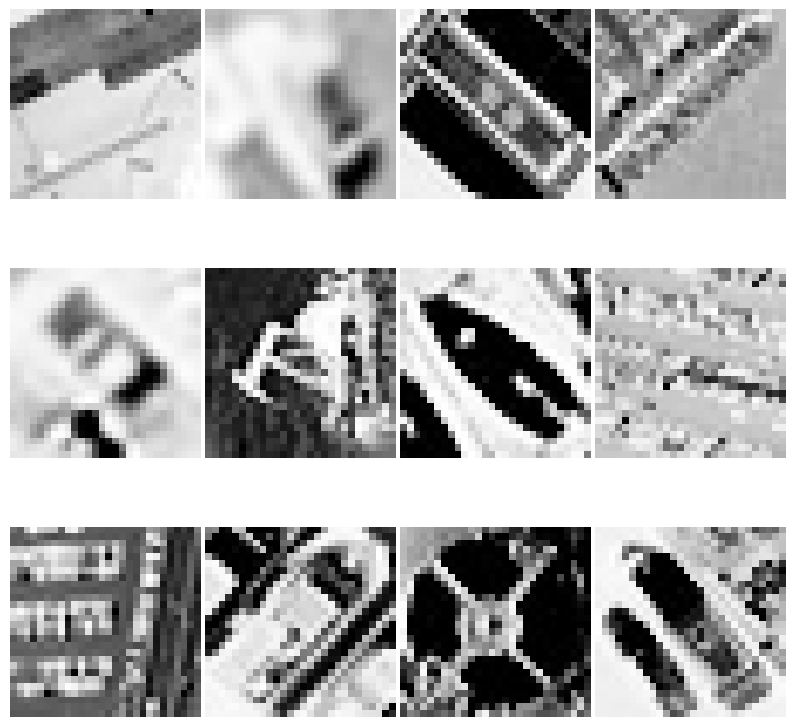

In [20]:
#data = pd.read_csv('/content/prueva.csv')
#data = data.to_numpy()
#X2, y2= data [:, 1:],data[:, 0]
#y[y == 24] = 0
#p = y2.size
print(data.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
rand_indices = np.random.choice(m, 12, replace=False)
XPrueba = X[rand_indices, :]
XPruebaV = XPrueba.copy()


print(XPrueba.shape)
XPrueba = np.concatenate([np.ones((12, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p, y[rand_indices])

displayData(XPruebaV)